In [1]:
%matplotlib inline
import torch
from cebm.utils import load_models, init_models
from cebm.data import setup_omniglot_loader

model_name = 'META_CEBM'
data, data_dir = 'omniglot', '../datasets/'
way, shot = 5, 20
dataset_args = {'data_dir': data_dir,
                'way': way,
                'shot': shot,
                'train': False,
                'normalize': True}
task_loader, im_h, im_w, im_channels = setup_omniglot_loader(**dataset_args)
device = torch.device('cuda:1')
network_args = {'num_clusters': way,
                'device': device,
                'im_height': im_h, 
                'im_width': im_w, 
                'input_channels': im_channels, 
                'channels': [64,64,64,64], 
                'kernels': [3,3,3,3], 
                'strides': [1,1,1,1], 
                'paddings': [1,1,1,1],
                'activation': 'ReLU',
                'latent_dim': 64}

sample_size, gibbs_sweeps = 1, 10
models = init_models(model_name, device, [], network_args)
exp_name = '%s_d=%s_z=%s' % \
            (model_name, data, network_args['latent_dim'])
load_models(models, exp_name)

In [2]:
test_episodes = task_loader.generate_tasks()

In [5]:
for t in test_episodes:
    images, labels = t
    break
images.shape

torch.Size([100, 1, 28, 28])

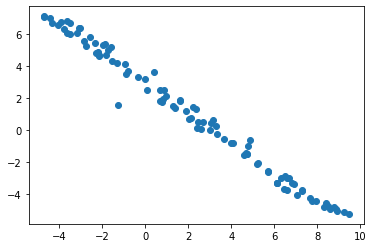

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
h = models['ebm'].forward(images.to(device)).detach().cpu()
h_2d = TSNE(n_components=2).fit_transform(h)
for c in range(len(labels.unique()))
plt.scatter(h_2d[:,0], h_2d[:,1])
# alpha, beta, mu, nu, pi, gammas, c_means, c_stds, ys = ebm.gibbs_updates(data_images, 
#                                                                          gibbs_sweeps, 
#                                                                          sample_size)

In [10]:
h_2d.shape

(100, 2)

In [12]:
labels.unique()

tensor([1259., 1479., 1506., 1509., 1520.])